In [4]:
import pandas as pd
import numpy as np

#### 1) Read the data 

In [2]:
df = pd.read_csv('C:\Users\james\Downloads\Datasets\NFL Play by Play 2009-2016 (v3).csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-82a3ef239cdc>, line 1)

In [3]:
# This error occurs because you are using a normal string as a path.

In [4]:
# Solutions:

In [38]:
#1
df = pd.read_csv(r'C:\Users\james\Downloads\Datasets\NFL Play by Play 2009-2016 (v3).csv')

In [6]:
#2 df = pd.read_csv('C:\\Users\\james\\Downloads\\Datasets\\NFL Play by Play 2009-2016 (v3).csv')

In [7]:
#3 df = pd.read_csv('C:/Users/james/Downloads/Datasets/NFL Play by Play 2009-2016 (v3).csv')

In [25]:
pd.options.display.max_rows = 150 # to set the max number of rows to be displayed after running a code.

In [26]:
pd.options.display.max_columns = 120

## Handling Missing Values

#### 2) Look for missing values

- It is reprsented with 'NaN' or 'None'

In [10]:
df.head()  # to get 1st 5(default) rows of dataset

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [11]:
df.isnull().sum()   # OR df.isna().sum()

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            54218
time                              188
TimeUnder                           0
TimeSecs                          188
PlayTimeDiff                      374
SideofField                       450
yrdln                             723
yrdline100                        723
ydstogo                             0
ydsnet                              0
GoalToGo                          723
FirstDown                       25597
posteam                         21979
DefensiveTeam                   21979
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  353399
TwoPointConv                   361919
DefTwoPoint                    362433
Safety      

In [12]:
df.shape

(362447, 102)

In [13]:
# 362447*102

tot = np.product(df.shape)

In [14]:
# how many total missing values do we have?

null_tot = df.isnull().sum().sum()

In [15]:
# percent of data that is missing

(null_tot / tot) * 100

24.85847694188906

#### 3) Drop missing values: rows

In [16]:
df.dropna()  # to drop all the rows with missing values

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


#### 4) Drop missing values: columns

In [17]:
df.dropna(axis = 1)  # to drop all the columns with missing values

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,Rusher_ID,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,0,0,0,Kickoff,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,0,0,0,Pass,00-0022924,1,-3,8,0,0,None,0,00-0017162,1,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,0,0,0,Run,None,0,0,0,0,0,00-0022250,1,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Pass,00-0022924,1,34,0,0,0,None,0,00-0026901,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,0,0,0,Punt,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1,10,35,1,35,1,1,0,0,Pass,00-0026498,1,35,0,0,0,None,0,00-0022084,1,0,0,0,0,0,DET,GB,0,None,0,0,0,0,0,0.000000,0.0,2016
362443,2017-01-01,2017010102,20,4,1,0,35,1,0,1,0,0,0,Extra Point,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,DET,GB,0,None,0,0,0,0,0,0.931115,0.0,2016
362444,2017-01-01,2017010102,21,4,1,0,0,1,0,0,0,0,1,Kickoff,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,DET,GB,0,None,0,0,0,0,0,0.000000,0.0,2016
362445,2017-01-01,2017010102,21,4,1,10,-1,1,-1,0,0,0,0,QB Kneel,None,0,0,0,0,0,00-0023459,0,None,0,0,0,0,0,0,DET,GB,0,None,0,0,0,0,0,0.000000,0.0,2016


#### 5) Fill in missing values

In [18]:
df.fillna(0)  # to fill the missing values with '0'

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,0.0,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,0,0,0,0,0,0,Kickoff,0,None,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,None,0,0,S.Logan,0,M.Griffin,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.000000,0.0,0.323526,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,0,0,0,0,0,0,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,0,0,None,0,0,0,H.Ward,00-0017162,1,0,0,0,C.Hope,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.000000,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,0,0,0,0,0,0,Run,0,None,0,0,0,0,0,0,0,0,0,W.Parker,00-0022250,1,right,end,0,None,0,0,0,0,S.Tulloch,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.000000,0.0,2.415907,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,0,0,0,0,0,0,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,0,0,None,0,0,0,M.Wallace,00-0026901,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.000000,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,0,0,0,0,0,Clean,Punt,0,None,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,None,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.000000,0.0,-0.699436,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [19]:
df.fillna(method='bfill', axis = 1) # to fill the missing values with values from the succeeding value in the same column

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,15:00,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,PIT,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,0,0,0,0,0,Kickoff,Kickoff,None,None,0,0,0,0,0,0,0,0,None,None,None,0,None,None,None,None,0,S.Logan,S.Logan,M.Griffin,M.Griffin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.2137,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.485675,0.485675,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009,2009,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,0,0,0,0,0,Pass,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,None,None,None,0,H.Ward,H.Ward,H.Ward,00-0017162,1,C.Hope,C.Hope,C.Hope,C.Hope,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.2937,0.003638,0.423011,0.0,0.0,2.338,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,0,0,0,0,0,Run,Run,None,None,0,0,0,0,0,0,0,0,W.Parker,W.Parker,00-0022250,1,right,end,None,None,0,S.Tulloch,S.Tulloch,S.Tulloch,S.Tulloch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.40276,0.551088,0.551088,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009,2009,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,0,0,0,0,0,Pass,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,None,None,None,0,M.Wallace,M.Wallace,M.Wallace,00-0026901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,0,0,0,0,0,Clean,Punt,None,None,0,0,0,0,0,0,0,0,None,None,None,0,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.21348,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.461217,0.461217,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009,2009,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [20]:
df.fillna(method='ffill', axis = 1) # to fill the missing values with values from the preceeding value in the same column

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,1,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,0.0,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,0,0,0,0,0,0,Kickoff,Kickoff,None,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,None,0,0,S.Logan,S.Logan,M.Griffin,M.Griffin,M.Griffin,M.Griffin,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.2137,0.003592,0.313676,0.0,0.0,0.323526,2.014474,2.014474,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.060758,0.060758,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,0,0,0,0,0,0,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,0,0,None,0,0,0,H.Ward,00-0017162,1,1,1,1,C.Hope,C.Hope,C.Hope,C.Hope,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.2937,0.003638,0.423011,0.0,0.0,2.338,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,0,0,0,0,0,0,Run,Run,None,0,0,0,0,0,0,0,0,0,W.Parker,00-0022250,1,right,end,end,None,0,0,0,0,S.Tulloch,S.Tulloch,S.Tulloch,S.Tulloch,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.40276,-1.40276,-1.40276,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,-0.040295,-0.040295,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,0,0,0,0,0,0,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,0,0,None,0,0,0,M.Wallace,00-0026901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,0,0,0,0,0,Clean,Punt,Punt,None,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.21348,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,2.097796,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.097712,0.097712,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Scaling and Normalization

In [21]:
# pip install mlxtend

In [2]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

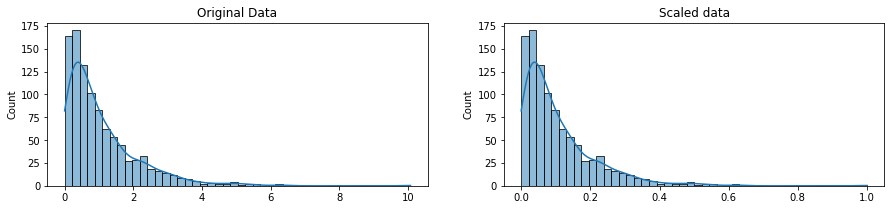

In [5]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [6]:
original_data

array([3.85834010e-01, 6.38503023e-01, 1.07965516e+00, 3.53712913e-03,
       1.25861090e+00, 8.21602293e-01, 5.35713645e-01, 1.57248100e-01,
       1.40608813e+00, 2.28903287e+00, 1.48766826e+00, 2.67569377e+00,
       1.82801274e-01, 2.48385046e-01, 1.30484123e+00, 4.43501705e-01,
       2.24872323e+00, 2.92997261e-01, 1.03235328e+00, 3.67691629e-01,
       2.36141637e-02, 1.42377964e+00, 3.10297469e+00, 4.20878015e-01,
       8.99743106e-01, 3.95573214e-01, 1.64278926e+00, 1.19811028e+00,
       4.44423892e-01, 8.90397144e-01, 3.34471770e-01, 2.50940794e+00,
       1.93755483e+00, 6.37626118e-02, 3.34060479e-01, 6.44955585e-01,
       1.17561493e-01, 2.59603380e-01, 5.80599067e-02, 4.67054740e-01,
       6.29880329e-02, 3.11504055e+00, 2.39772851e-01, 3.65133748e+00,
       7.55703402e-01, 1.72250924e+00, 2.77885825e+00, 7.21653710e-01,
       6.06572765e-01, 2.56717487e-01, 3.05092647e+00, 3.52849608e-01,
       4.39359043e-01, 9.79289624e-01, 1.01911396e-02, 3.41402029e-01,
      

In [7]:
scaled_data

array([[3.83129735e-02],
       [6.34058377e-02],
       [1.07217188e-01],
       [3.46609542e-04],
       [1.24989498e-01],
       [8.15896469e-02],
       [5.31977007e-02],
       [1.56118313e-02],
       [1.39635640e-01],
       [2.27321946e-01],
       [1.47737461e-01],
       [2.65721706e-01],
       [1.81495478e-02],
       [2.46627512e-02],
       [1.29580688e-01],
       [4.40400219e-02],
       [2.23318747e-01],
       [2.90932441e-02],
       [1.02519582e-01],
       [3.65112318e-02],
       [2.34048404e-03],
       [1.41392605e-01],
       [3.08155489e-01],
       [4.17932359e-02],
       [8.93499052e-02],
       [3.92801856e-02],
       [1.63142715e-01],
       [1.18981109e-01],
       [4.41316053e-02],
       [8.84217464e-02],
       [3.32121275e-02],
       [2.49207660e-01],
       [1.92416238e-01],
       [6.32767481e-03],
       [3.31712818e-02],
       [6.40466494e-02],
       [1.16705065e-02],
       [2.57768576e-02],
       [5.76133229e-03],
       [4.63791021e-02],


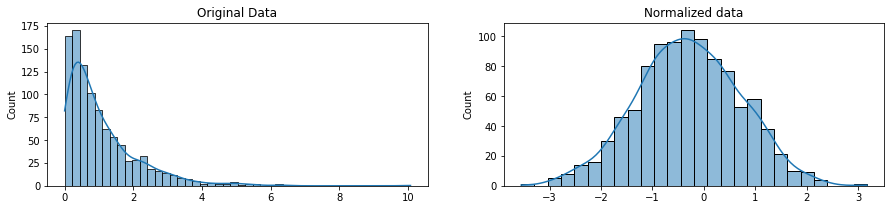

In [8]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [9]:
original_data

array([3.85834010e-01, 6.38503023e-01, 1.07965516e+00, 3.53712913e-03,
       1.25861090e+00, 8.21602293e-01, 5.35713645e-01, 1.57248100e-01,
       1.40608813e+00, 2.28903287e+00, 1.48766826e+00, 2.67569377e+00,
       1.82801274e-01, 2.48385046e-01, 1.30484123e+00, 4.43501705e-01,
       2.24872323e+00, 2.92997261e-01, 1.03235328e+00, 3.67691629e-01,
       2.36141637e-02, 1.42377964e+00, 3.10297469e+00, 4.20878015e-01,
       8.99743106e-01, 3.95573214e-01, 1.64278926e+00, 1.19811028e+00,
       4.44423892e-01, 8.90397144e-01, 3.34471770e-01, 2.50940794e+00,
       1.93755483e+00, 6.37626118e-02, 3.34060479e-01, 6.44955585e-01,
       1.17561493e-01, 2.59603380e-01, 5.80599067e-02, 4.67054740e-01,
       6.29880329e-02, 3.11504055e+00, 2.39772851e-01, 3.65133748e+00,
       7.55703402e-01, 1.72250924e+00, 2.77885825e+00, 7.21653710e-01,
       6.06572765e-01, 2.56717487e-01, 3.05092647e+00, 3.52849608e-01,
       4.39359043e-01, 9.79289624e-01, 1.01911396e-02, 3.41402029e-01,
      

In [10]:
normalized_data

(array([-8.43357457e-01, -4.23393683e-01,  7.74122820e-02, -2.95564307e+00,
         2.37042692e-01, -1.91551938e-01, -5.76033035e-01, -1.46776603e+00,
         3.56406195e-01,  9.24291500e-01,  4.18498796e-01,  1.12196333e+00,
        -1.37294431e+00, -1.16798837e+00,  2.75524612e-01, -7.32683779e-01,
         9.02295675e-01, -1.05057998e+00,  3.19734236e-02, -8.80698866e-01,
        -2.39149746e+00,  3.70093527e-01,  1.31718302e+00, -7.74756289e-01,
        -1.04204795e-01, -8.23844925e-01,  5.29937088e-01,  1.85070450e-01,
        -7.31002808e-01, -1.14349093e-01, -9.52762767e-01,  1.03972892e+00,
         7.21859937e-01, -1.96440871e+00, -9.53687508e-01, -4.14436473e-01,
        -1.64072269e+00, -1.13708335e+00, -2.00957796e+00, -6.90536561e-01,
        -1.97036386e+00,  1.32239892e+00, -1.19242179e+00,  1.54048289e+00,
        -2.70126174e-01,  5.84202933e-01,  1.17109919e+00, -3.12727457e-01,
        -4.68730523e-01, -1.14493777e+00,  1.29450992e+00, -9.12274187e-01,
        -7.4

## Parsing Dates

In [12]:
earthquakes = pd.read_csv(r'C:\Users\james\Downloads\Datasets\database.csv')

#### 1) Check the data type of our date column

In [13]:
earthquakes.Date.dtype

dtype('O')

#### 2) Convert our date columns to datetime

In [14]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [15]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [16]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [19]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")
earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29


#### 3) Select the day of the month

In [21]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

#### 4) Plot the day of the month to check the date parsing

C:\Users\james\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

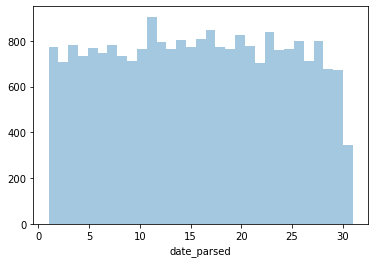

In [22]:
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

## Character Encodings

In [1]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [2]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [3]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [4]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [5]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [6]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

In [7]:
after

b'This is the euro symbol: ?'

In [8]:
# convert it back to utf-8
print(after.decode("ascii"))

This is the euro symbol: ?


In [9]:
before

'This is the euro symbol: €'

In [ ]:
# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :?

## Inconsistent Data Entry

In [6]:
df.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)

In [7]:
df

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.000000,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.000000,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.000000,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.000000,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.000000,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [28]:
df['Passer'].unique()

array([nan, 'B.Roethlisberger', 'K.Collins', 'B.Quinn', 'B.Favre',
       'T.Jackson', 'D.Brees', 'M.Stafford', 'T.Romo', 'B.Leftwich',
       'M.Clayton', 'M.Schaub', 'M.Sanchez', 'P.Manning', 'D.Garrard',
       'K.Orton', 'C.Palmer', 'J.Delhomme', 'D.McNabb', 'K.Kolb',
       'J.McCown', 'M.Moore', 'B.Croyle', 'J.Flacco', 'M.Ryan',
       'C.Pennington', 'P.White', 'K.Warner', 'S.Hill', 'M.Hasselbeck',
       'M.Bulger', 'E.Manning', 'J.Campbell', 'A.Rodgers', 'J.Cutler',
       'T.Brady', 'T.Edwards', 'J.Russell', 'P.Rivers', 'B.Gradkowski',
       'C.Portis', 'B.Westbrook', 'M.Cassel', 'M.Leinart', 'S.Wallace',
       'M.Spurlock', 'D.Anderson', 'T.Smith', 'L.Washington', 'D.Carr',
       'J.Johnson', 'M.Vick', 'M.Bradley', 'K.Boller', 'B.Moorman',
       'C.Henne', 'D.Culpepper', 'C.Hanson', 'S.Rice', 'L.McCown',
       'V.Young', 'R.Brown', 'D.Stanton', 'J.Cribbs', 'T.Collins',
       'J.Ryan', 'B.Hoyer', 'R.Fitzpatrick', 'S.Weatherford', 'J.Freeman',
       'M.Gutierrez', 'A.Sm

In [9]:
strings = df['Passer'].unique()

In [15]:
# pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install python-Levenshtein

'''
# Warning Error - Below warning was shown before installing this.
UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning warnings.warn

# Reason:
fuzzywuzzy sequence matcher is purely python based (unlike numpy, elastic search etc which are based on "C"). 
This results in much slower process than any matcher which is based on C. That is why the warning shows up. 
'''

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\james\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\james\\AppData\\Local\\Temp\\pip-install-hv0a_mlk\\python-levenshtein_726bf046ebe04303a34b618b7ec0b0ff\\setup.py'"'"'; __file__='"'"'C:\\Users\\james\\AppData\\Local\\Temp\\pip-install-hv0a_mlk\\python-levenshtein_726bf046ebe04303a34b618b7ec0b0ff\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\james\AppData\Local\Temp\pip-wheel-tydft8a2'
       cwd: C:\Users\james\AppData\Local\Temp\pip-install-hv0a_mlk\python-levenshtein_726bf046ebe04303a34b618b7ec0b0ff\
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\Levenshtein
  copying Levenshtein\StringMat


  Running setup.py clean for python-Levenshtein
Failed to build python-Levenshtein
    Running setup.py install for python-Levenshtein: started
    Running setup.py install for python-Levenshtein: finished with status 'error'


In [5]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

In [30]:
matches = fuzzywuzzy.process.extract('C.Palmer', strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [31]:
matches

[('C.Palmer', 100),
 ('J.Palmer', 88),
 ('C.Painter', 71),
 ('C.Ponder', 62),
 ('M.Prater', 62),
 ('B.Walters', 59),
 ('C.Kessler', 59),
 ('C.Meredith', 56),
 ('C.Hanie', 53),
 ('C.Henry', 53)]

In [32]:
close_matches = [matches[0] for matches in matches if matches[1] >= 80]

In [33]:
close_matches

['C.Palmer', 'J.Palmer']

In [34]:
rows_with_matches = df['Passer'].isin(close_matches)

In [35]:
rows_with_matches

0         False
1         False
2         False
3         False
4         False
          ...  
362442    False
362443    False
362444    False
362445    False
362446    False
Name: Passer, Length: 362447, dtype: bool

In [36]:
df.loc[rows_with_matches, 'Passer'] = 'C.Palmer'

In [43]:
df['Passer'].unique().shape

(331,)

In [42]:
df['Passer'].replace('C.Palmer', 'J.Palmer', regex=True)

0                      NaN
1         B.Roethlisberger
2                      NaN
3         B.Roethlisberger
4                      NaN
                ...       
362442          M.Stafford
362443                 NaN
362444                 NaN
362445                 NaN
362446                 NaN
Name: Passer, Length: 362447, dtype: object